In [24]:
import matplotlib.pyplot as plt
import numpy as np
import re

In [25]:
data = {
'Аналитик':{'salary':{2005: 91685, 2006: 99460, 2007: 127011, 2008: 90937, 2009: 62765, 2010: 57539, 2011: 65709, 2012: 66936, 2013: 68807, 2014: 63967, 2015: 61877, 2016: 58545, 2017: 64207, 2018: 68918, 2019: 79066, 2020: 89553, 2021: 98434, 2022: 107838},'city':{'Москва': 98327, 'Санкт-Петербург': 73092, 'Минск': 63887, 'Киев': 62013, 'Самара': 61095, 'Екатеринбург': 56670, 'Новосибирск': 56668, 'Нижний Новгород': 56544, 'Ростов-на-Дону': 51852, 'Казань': 51312},},
'1С-разработчик':{'salary':{2005: 74763, 2006: 85015, 2007: 97633, 2008: 73015, 2009: 51900, 2010: 58001, 2011: 60510, 2012: 61402, 2013: 64682, 2014: 63371, 2015: 61501, 2016: 61599, 2017: 67525, 2018: 74062, 2019: 80730, 2020: 85326, 2021: 96183, 2022: 116286},'city':{'Москва': 96954, 'Санкт-Петербург': 73805, 'Екатеринбург': 72199, 'Новосибирск': 70129, 'Воронеж': 63725, 'Самара': 63490, 'Краснодар': 63262, 'Пермь': 62568, 'Челябинск': 62210, 'Омск': 61361},},
'Руководитель ИТ-проектов':{'salary':{2005: 151852, 2006: 162834, 2007: 158046, 2008: 124379, 2009: 85579, 2010: 78060, 2011: 83091, 2012: 86869, 2013: 86171, 2014: 85560, 2015: 94570, 2016: 91780, 2017: 112116, 2018: 125680, 2019: 118942, 2020: 116491, 2021: 131759, 2022: 152391},'city':{'Киев': 171788, 'Москва': 135227, 'Санкт-Петербург': 114577, 'Новосибирск': 113502, 'Минск': 112935, 'Екатеринбург': 101913, 'Самара': 85777, 'Казань': 85646, 'Нижний Новгород': 82323, 'Краснодар': 77570},},
'Специалист техподдержки':{'salary':{2005: 69175, 2006: 103593, 2007: 111413, 2008: 86222, 2009: 60741, 2010: 58307, 2011: 66045, 2012: 54469, 2013: 56952, 2014: 55713, 2015: 46580, 2016: 76739, 2017: 64969, 2018: 231628, 2019: 100787, 2020: 66651, 2021: 64544, 2022: 72955},'city':{'Екатеринбург': 121392, 'Киев': 118116, 'Минск': 113353, 'Москва': 108626, 'Санкт-Петербург': 102883, 'Нижний Новгород': 102727, 'Самара': 86150, 'Новосибирск': 83475, 'Казань': 75108, 'Владивосток': 62103},},
'Системный администратор':{'salary':{2005: 56980, 2006: 65776, 2007: 78061, 2008: 51659, 2009: 37104, 2010: 35372, 2011: 38781, 2012: 39978, 2013: 39845, 2014: 36355, 2015: 42446, 2016: 40508, 2017: 42993, 2018: 46345, 2019: 48558, 2020: 52007, 2021: 56511, 2022: 58503},'city':{'Москва': 61643, 'Санкт-Петербург': 48726, 'Екатеринбург': 43462, 'Новосибирск': 41651, 'Краснодар': 35802, 'Красноярск': 35796, 'Алматы': 34668, 'Самара': 34504, 'Нижний Новгород': 33867, 'Уфа': 32498},},
'UX/UI дизайнер':{'salary':{2005: 66084, 2006: 104454, 2007: 86165, 2008: 73551, 2009: 62946, 2010: 48848, 2011: 58983, 2012: 59313, 2013: 52484, 2014: 51837, 2015: 51310, 2016: 60709, 2017: 63068, 2018: 73340, 2019: 73214, 2020: 80892, 2021: 87684, 2022: 67673},'city':{'Москва': 85587, 'Санкт-Петербург': 73273, 'Новосибирск': 66924, 'Киев': 66878, 'Екатеринбург': 66615, 'Минск': 59555, 'Нижний Новгород': 54765, 'Самара': 50885, 'Казань': 48895, 'Краснодар': 48655},},
'Менеджер IT-проекта':{'salary':{2005: 124942, 2006: 121531, 2007: 145739, 2008: 103624, 2009: 67613, 2010: 59782, 2011: 78622, 2012: 61342, 2013: 66726, 2014: 66210, 2015: 66569, 2016: 55308, 2017: 60789, 2018: 67603, 2019: 70572, 2020: 75281, 2021: 82348, 2022: 97190},'city':{'Москва': 92301, 'Киев': 83220, 'Санкт-Петербург': 72161, 'Екатеринбург': 68789, 'Новосибирск': 68102, 'Минск': 66996, 'Нижний Новгород': 57446, 'Казань': 56499, 'Челябинск': 56274, 'Краснодар': 53883},},
'Тестировщик (QA-инженер)':{'salary':{2005: 84776, 2006: 97863, 2007: 89301, 2008: 78486, 2009: 50291, 2010: 46176, 2011: 51167, 2012: 76754, 2013: 59607, 2014: 96495, 2015: 54428, 2016: 65723, 2017: 63959, 2018: 75970, 2019: 79253, 2020: 82972, 2021: 113697, 2022: 117457},'city':{'Казань': 190689, 'Москва': 90153, 'Киев': 82188, 'Санкт-Петербург': 77360, 'Минск': 63569, 'Екатеринбург': 59927, 'Новосибирск': 59845, 'Самара': 59708, 'Томск': 54371, 'Нижний Новгород': 54347},},
'Инженер-программис':{'salary':{2005: 124008, 2006: 128053, 2007: 122004, 2008: 112294, 2009: 97260, 2010: 84024, 2011: 85471, 2012: 97082, 2013: 95793, 2014: 91174, 2015: 117659, 2016: 152464, 2017: 161556, 2018: 262186, 2019: 144096, 2020: 132843, 2021: 158599, 2022: 217424},'city':{'Екатеринбург': 250765, 'Киев': 217986, 'Москва': 175135, 'Минск': 164714, 'Санкт-Петербург': 140153, 'Казань': 133883, 'Новосибирск': 131878, 'Нижний Новгород': 131371, 'Самара': 112681},},
'Frontend-программист ':{'salary':{2005: 36396, 2006: 52746, 2007: 57354, 2008: 46581, 2009: 33507, 2010: 33378, 2011: 58827, 2012: 40115, 2013: 41144, 2014: 53607, 2015: 56997, 2016: 61883, 2017: 81506, 2018: 91541, 2019: 109814, 2020: 108357, 2021: 139279, 2022: 151869},'city':{'Киев': 116114, 'Москва': 109018, 'Новосибирск': 102252, 'Санкт-Петербург': 98389, 'Екатеринбург': 98357, 'Нижний Новгород': 87479, 'Краснодар': 84076, 'Самара': 82160, 'Томск': 82013, 'Минск': 81543},},
'Специалист по информационной безопасности':{'salary':{2005: 0, 2006: 100089, 2007: 223110, 2008: 107107, 2009: 78420, 2010: 80068, 2011: 47361, 2012: 56575, 2013: 62944, 2014: 67178, 2015: 138528, 2016: 83170, 2017: 84505, 2018: 95913, 2019: 98431, 2020: 73232, 2021: 122568, 2022: 210861},'city':{'Москва': 128055, 'Санкт-Петербург': 97419, 'Новосибирск': 74428, 'Казань': 74000, 'Киев': 67538, 'Воронеж': 49203, 'Чебоксары': 37500, 'Краснодар': 28700, 'Пенза': 20000},},
'ERP-специалист':{'salary':{2005: 138199, 2006: 175160, 2007: 176442, 2008: 165184, 2009: 118613, 2010: 98401, 2011: 93220, 2012: 77765, 2013: 95057, 2014: 72538, 2015: 69224, 2016: 73894, 2017: 76620, 2018: 84223, 2019: 92913, 2020: 93829, 2021: 106108, 2022: 124599},'city':{'Москва': 120558, 'Киев': 106825, 'Санкт-Петербург': 93006, 'Пермь': 83733, 'Казань': 81852, 'Новосибирск': 77788, 'Минск': 75812, 'Екатеринбург': 74627, 'Нижний Новгород': 72207, 'Самара': 65707},},
'Backend-программист ':{'salary':{2005: 0, 2006: 0, 2007: 0, 2008: 0, 2009: 65884, 2010: 61380, 2011: 67883, 2012: 84549, 2013: 74629, 2014: 74651, 2015: 78983, 2016: 84073, 2017: 97767, 2018: 106734, 2019: 115622, 2020: 117817, 2021: 146815, 2022: 165075},'city':{'Москва': 143340, 'Киев': 123335, 'Казань': 120506, 'Самара': 118740, 'Санкт-Петербург': 117479, 'Нижний Новгород': 113571, 'Новосибирск': 111852, 'Екатеринбург': 110045, 'Минск': 109153, 'Томск': 104235},},
'Java-программист':{'salary':{2005: 86215, 2006: 107610, 2007: 119689, 2008: 100536, 2009: 73306, 2010: 79946, 2011: 76844, 2012: 78713, 2013: 89988, 2014: 85970, 2015: 98057, 2016: 116399, 2017: 113367, 2018: 136819, 2019: 126742, 2020: 129056, 2021: 172192, 2022: 197586},'city':{'Киев': 158897, 'Москва': 135122, 'Минск': 130157, 'Санкт-Петербург': 119571, 'Самара': 114790, 'Новосибирск': 110861, 'Нижний Новгород': 102147, 'Казань': 100888, 'Екатеринбург': 99855, 'Омск': 96323},},
'Администратор баз данных ':{'salary':{2005: 79764, 2006: 97430, 2007: 106284, 2008: 89222, 2009: 59371, 2010: 57732, 2011: 62711, 2012: 61311, 2013: 56337, 2014: 60264, 2015: 58849, 2016: 58928, 2017: 75892, 2018: 93785, 2019: 82322, 2020: 87724, 2021: 98671, 2022: 117198},'city':{'Москва': 92935, 'Киев': 86871, 'Минск': 82025, 'Санкт-Петербург': 75772, 'Новосибирск': 72573, 'Краснодар': 57562, 'Екатеринбург': 54268, 'Нижний Новгород': 50712, 'Пермь': 50707, 'Казань': 47847},},
'Devops-инженер ':{'salary':{2005: 0, 2006: 0, 2007: 0, 2008: 0, 2009: 0, 2010: 0, 2011: 0, 2012: 75000, 2013: 91000, 2014: 104450, 2015: 112799, 2016: 145737, 2017: 120921, 2018: 130577, 2019: 136417, 2020: 144933, 2021: 185287, 2022: 216813},'city':{'Киев': 175294, 'Минск': 171567, 'Москва': 166759, 'Санкт-Петербург': 156112, 'Казань': 143064, 'Краснодар': 129354, 'Новосибирск': 125985, 'Нижний Новгород': 119561, 'Самара': 118833, 'Ростов-на-Дону': 106529},},
'PHP-программист':{'salary':{2005: 65493, 2006: 67211, 2007: 77857, 2008: 69680, 2009: 52126, 2010: 48323, 2011: 53133, 2012: 59265, 2013: 63520, 2014: 63065, 2015: 63011, 2016: 69717, 2017: 76041, 2018: 81325, 2019: 89677, 2020: 94024, 2021: 121170, 2022: 135759},'city':{'Москва': 96401, 'Киев': 84921, 'Санкт-Петербург': 82510, 'Екатеринбург': 80317, 'Новосибирск': 78683, 'Минск': 78612, 'Краснодар': 75177, 'Самара': 74900, 'Томск': 72103, 'Нижний Новгород': 70430},},
'Web-разработчик ':{'salary':{2005: 77973, 2006: 150367, 2007: 100795, 2008: 68367, 2009: 51581, 2010: 77608, 2011: 58882, 2012: 70505, 2013: 40836, 2014: 75034, 2015: 68686, 2016: 77706, 2017: 81400, 2018: 96092, 2019: 94217, 2020: 87936, 2021: 106175, 2022: 85052},'city':{'Киев': 104633, 'Москва': 104149, 'Самара': 90045, 'Минск': 86707, 'Санкт-Петербург': 85153, 'Новосибирск': 80379, 'Краснодар': 74019, 'Красноярск': 72443, 'Нижний Новгород': 71981, 'Воронеж': 68342},},
'Python-программист':{'salary':{2005: 0, 2006: 59649, 2007: 134589, 2008: 89520, 2009: 57935, 2010: 63038, 2011: 79287, 2012: 77705, 2013: 78389, 2014: 72186, 2015: 85833, 2016: 96113, 2017: 97268, 2018: 114380, 2019: 121063, 2020: 123436, 2021: 151735, 2022: 180116},'city':{'Киев': 143680, 'Москва': 133627, 'Минск': 122508, 'Санкт-Петербург': 116510, 'Новосибирск': 112823, 'Казань': 107985, 'Нижний Новгород': 107346, 'Краснодар': 97353, 'Тюмень': 94689, 'Екатеринбург': 94029},},
'C/C++ программист':{'salary':{2005: 107057, 2006: 100701, 2007: 117713, 2008: 99923, 2009: 66636, 2010: 67847, 2011: 68116, 2012: 73066, 2013: 84303, 2014: 100804, 2015: 96397, 2016: 102154, 2017: 103919, 2018: 133146, 2019: 124813, 2020: 127263, 2021: 144562, 2022: 187634},'city':{'Киев': 150880, 'Минск': 116792, 'Москва': 115067, 'Екатеринбург': 104252, 'Санкт-Петербург': 103362, 'Казань': 96755, 'Новосибирск': 96045, 'Самара': 89265, 'Томск': 86235, 'Нижний Новгород': 83895},},
'Android-разработчик ':{'salary':{2005: 0, 2006: 0, 2007: 0, 2008: 0, 2009: 150556, 2010: 71132, 2011: 98805, 2012: 73679, 2013: 78106, 2014: 78217, 2015: 91297, 2016: 99105, 2017: 100349, 2018: 105737, 2019: 123979, 2020: 129636, 2021: 155531, 2022: 195955},'city':{'Москва': 143322, 'Киев': 125350, 'Санкт-Петербург': 122548, 'Минск': 100005, 'Новосибирск': 99266, 'Екатеринбург': 98803, 'Нижний Новгород': 97436, 'Самара': 96538, 'Пермь': 93152, 'Уфа': 92496},},
'Разработчик игр (GameDev)':{'salary':{2005: 37912, 2006: 55102, 2007: 78331, 2008: 82000, 2009: 58566, 2010: 53696, 2011: 54372, 2012: 58216, 2013: 85009, 2014: 61802, 2015: 70634, 2016: 82557, 2017: 75321, 2018: 82266, 2019: 94926, 2020: 97931, 2021: 107789, 2022: 117869},'city':{'Киев': 110002, 'Санкт-Петербург': 99236, 'Калининград': 97514, 'Москва': 96714, 'Краснодар': 87981, 'Минск': 87241, 'Томск': 74115, 'Новосибирск': 69796, 'Челябинск': 67532, 'Казань': 66214},},
'Fullstack-программист':{'salary':{2005: 0, 2006: 0, 2007: 0, 2008: 0, 2009: 0, 2010: 0, 2011: 0, 2012: 0, 2013: 0, 2014: 106155, 2015: 200298, 2016: 128773, 2017: 116660, 2018: 110383, 2019: 127558, 2020: 122546, 2021: 152585, 2022: 180548},'city':{'Киев': 180529, 'Москва': 150430, 'Нижний Новгород': 146809, 'Самара': 137482, 'Санкт-Петербург': 133006, 'Новосибирск': 129779, 'Минск': 128552, 'Казань': 125514, 'Екатеринбург': 125262, 'Краснодар': 112995},},
'IOS-разработчик ':{'salary':{2005: 0, 2006: 106155, 2007: 97056, 2008: 0, 2009: 106155, 2010: 62916, 2011: 81882, 2012: 76882, 2013: 77767, 2014: 77551, 2015: 105140, 2016: 98962, 2017: 106179, 2018: 110426, 2019: 127405, 2020: 140485, 2021: 164681, 2022: 203267},'city':{'Киев': 159371, 'Москва': 146100, 'Санкт-Петербург': 124025, 'Екатеринбург': 114420, 'Минск': 110304, 'Омск': 103313, 'Нижний Новгород': 102478, 'Новосибирск': 102306, 'Пермь': 102079, 'Краснодар': 99652},},
'C# программист':{'salary':{2005: 75825, 2006: 105834, 2007: 133476, 2008: 96047, 2009: 59261, 2010: 57049, 2011: 61149, 2012: 66389, 2013: 80114, 2014: 72750, 2015: 76012, 2016: 82172, 2017: 90215, 2018: 111719, 2019: 106385, 2020: 111679, 2021: 135117, 2022: 166611},'city':{'Киев': 143518, 'Москва': 116520, 'Минск': 103498, 'Санкт-Петербург': 97549, 'Нижний Новгород': 87302, 'Екатеринбург': 84333, 'Краснодар': 83908, 'Казань': 82243, 'Челябинск': 82186, 'Новосибирск': 80272},},
}



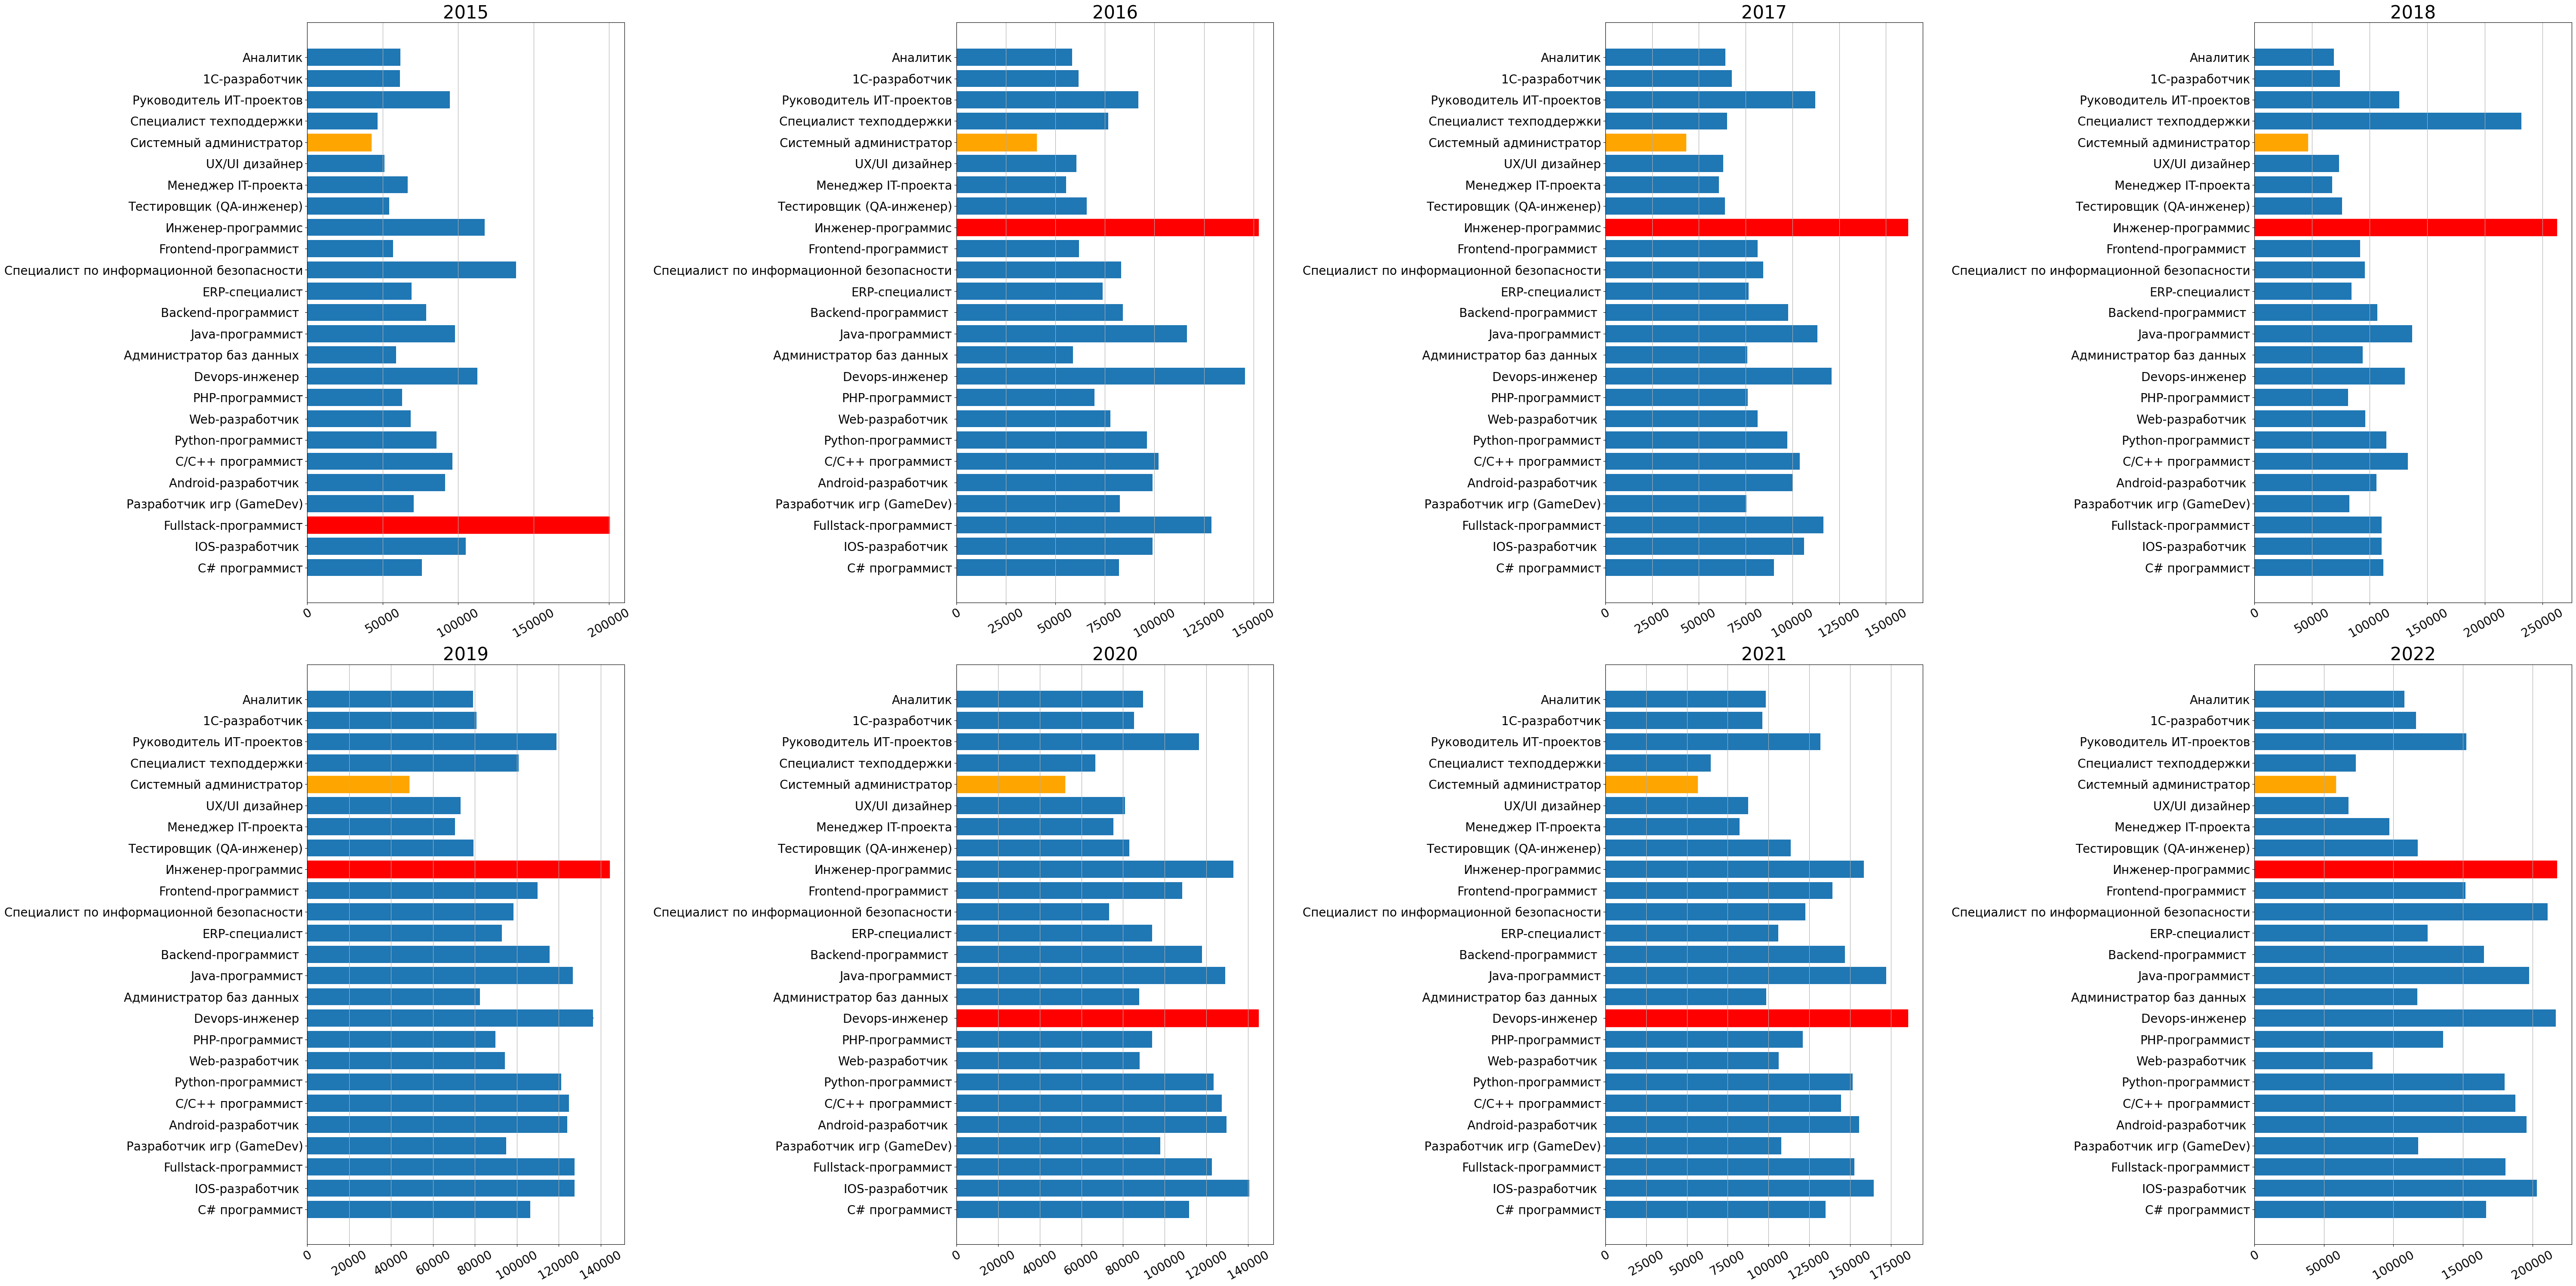

In [26]:
years = list(range(2015,2023))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22',
          '#17becf', '#6633FF']

fig, axs = plt.subplots(nrows=2, ncols=4)
fig.set_size_inches(60,30, forward=True)  


error = np.random.rand(len(data.keys()))
y_pos = np.arange(len(data.keys()))

for i, year in enumerate(years[:4]):
        salaries = list(data[vac]['salary'][year] for vac in data.keys())
        #axs[0,i].bar(data.keys(),salaries , color = '#1e5178')
        
        
        axs[0,i].barh(y_pos, salaries, xerr=error, align='center')
        axs[0,i].set_yticks(y_pos, labels=data.keys())
        axs[0,i].invert_yaxis()
        axs[0,i].xaxis.grid(True)
        
        axs[0,i].tick_params(axis='x', rotation=30, labelsize=20)
        axs[0,i].set_title(year, size=30)
        axs[0,i].tick_params(axis='y', labelsize=20)
        axs[0,i].get_children()[salaries.index(max(salaries))].set_color('r')  
        axs[0,i].get_children()[salaries.index(min(salaries))].set_color('orange')  

        #axs[0,i].set_facecolor('#0e1117')
        #ax_1.barh(y_pos, city_name.values(), xerr=error, align='center')

for i, year in enumerate(years[4:]):
        salaries = list(data[vac]['salary'][year] for vac in data.keys())
        
        axs[1,i].barh(y_pos, salaries, xerr=error, align='center')
        axs[1,i].set_yticks(y_pos, labels=data.keys())
        axs[1,i].invert_yaxis()
        axs[1,i].xaxis.grid(True)
        
        #axs[1,i].bar(data.keys(),salaries, color = '#1e5178')
        axs[1,i].tick_params(axis='x', rotation=30, labelsize=20)
        axs[1,i].set_title(year, size=30)
        axs[1,i].tick_params(axis='y', labelsize=20)
        axs[1,i].get_children()[salaries.index(max(salaries))].set_color('r')  
        axs[1,i].get_children()[salaries.index(min(salaries))].set_color('orange')

        #axs[1,i].set_facecolor('#0e1117')


# ax.set_facecolor('#4E4E50')
#fig.patch.set_facecolor('#0e1117')
fig. tight_layout ()
plt.show()



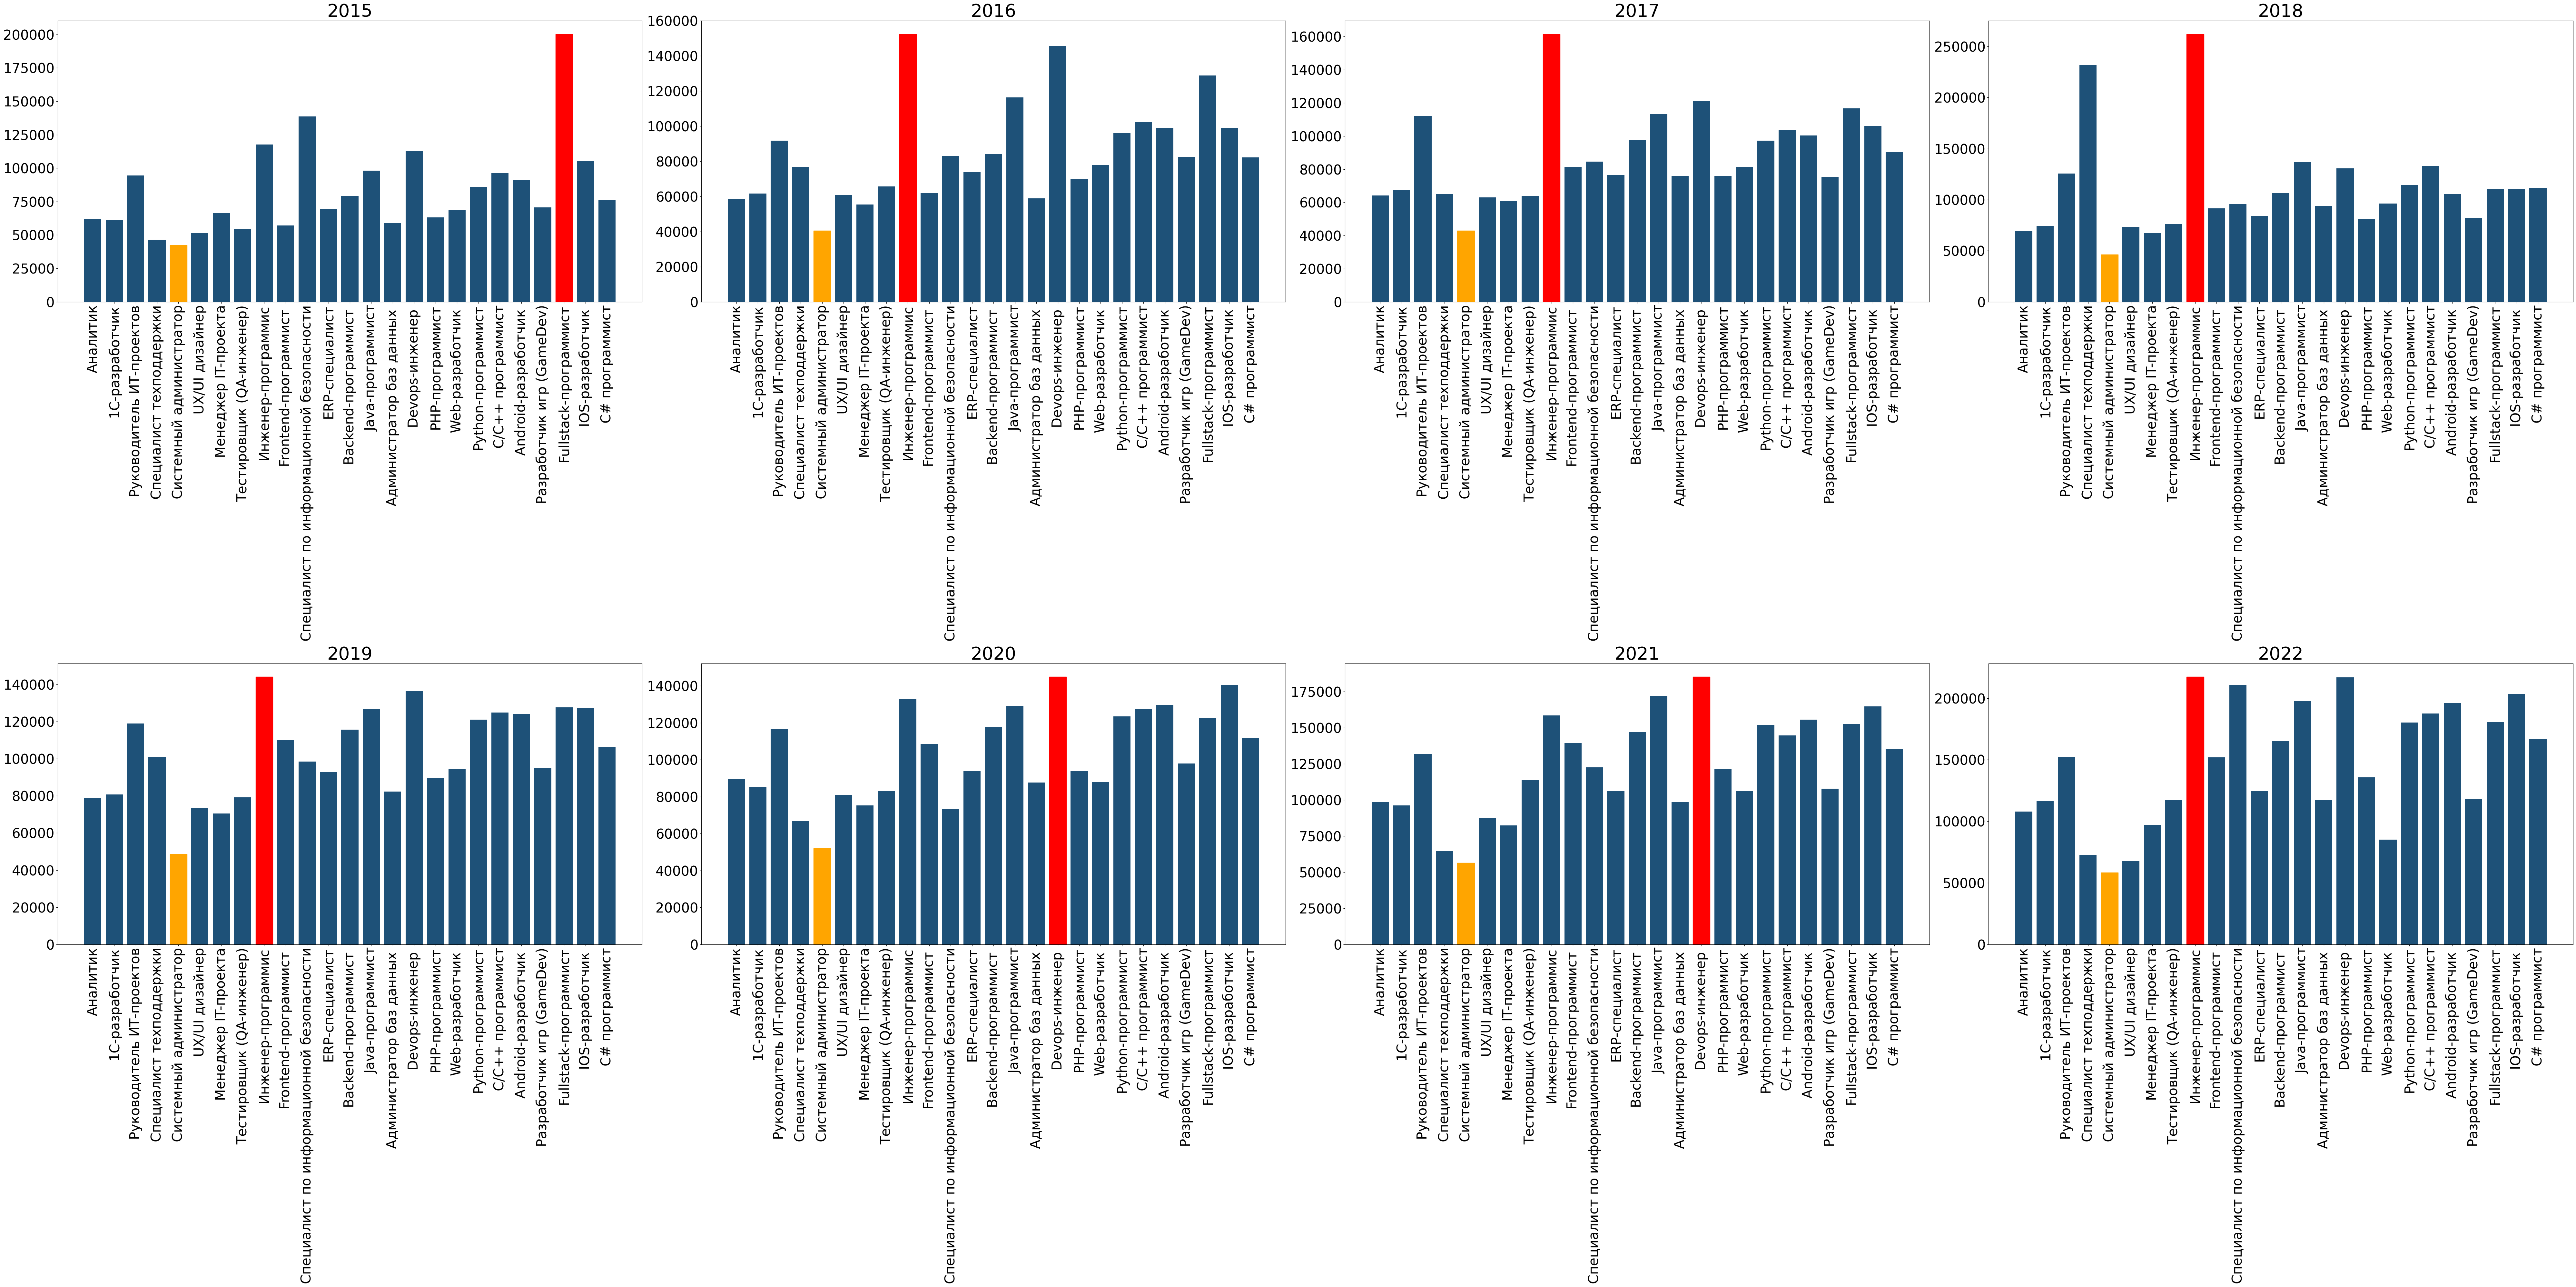

In [27]:
years = list(range(2015,2023))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22',
          '#17becf', '#6633FF']

fig, axs = plt.subplots(nrows=2, ncols=4)
fig.set_size_inches(80,40, forward=True)  

for i, year in enumerate(years[:4]):
        salaries = list(data[vac]['salary'][year] for vac in data.keys())
        axs[0,i].bar(data.keys(),salaries , color = '#1e5178')
        axs[0,i].tick_params(axis='x', rotation=90, labelsize=30)
        axs[0,i].set_title(year, size=40)
        axs[0,i].tick_params(axis='y', labelsize=30)
        axs[0,i].get_children()[salaries.index(max(salaries))].set_color('r')  
        axs[0,i].get_children()[salaries.index(min(salaries))].set_color('orange')  

        #axs[0,i].set_facecolor('#0e1117')
        
for i, year in enumerate(years[4:]):
        salaries = list(data[vac]['salary'][year] for vac in data.keys())
        axs[1,i].bar(data.keys(),salaries, color = '#1e5178')
        axs[1,i].tick_params(axis='x', rotation=90, labelsize=30)
        axs[1,i].set_title(year, size=40)
        axs[1,i].tick_params(axis='y', labelsize=30)
        axs[1,i].get_children()[salaries.index(max(salaries))].set_color('r')  
        axs[1,i].get_children()[salaries.index(min(salaries))].set_color('orange')

# ax.set_facecolor('#4E4E50')
#fig.patch.set_facecolor('#0e1117')
fig. tight_layout ()
plt.show()